In [ ]:
# Mohammad Hamid Abubaker
# Student Number: ST10120912
# Module Code : PDAN8412
# Final POE

In [1]:
# Importing all the important libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers 
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten,MaxPooling2D
import pandas as pd
import tensorflow as tf


In [2]:
# Printing current working directory and contents
print(os.getcwd())

C:\Users\saglo\Hamid\Final POE


In [3]:
# Printing current working directory and contents
print(os.listdir())

['.ipynb_checkpoints', 'Chess dataset', 'Final POE.ipynb']


In [60]:
# Setting up directory paths
NOTEBOOK_DIR = os.path.abspath('')
SCRIPT_DIR = os.path.join(NOTEBOOK_DIR, 'Final POE')

DATASET_PATH = os.path.join(SCRIPT_DIR, '..', 'Chess dataset')
TRAIN_PATH = os.path.join(DATASET_PATH, 'mytrain')
TEST_PATH = os.path.join(DATASET_PATH, 'mytest')

In [61]:
# Checking if directories exist and display first 10 Items
if os.path.exists(TRAIN_PATH):
    print(f"The path {TRAIN_PATH} exists.")
    
   
    contents = os.listdir(TRAIN_PATH)[:10]
    print(f"First 10 items in the directory: {contents}")
else:
    print(f"The path {TRAIN_PATH} does not exist.")

The path C:\Users\saglo\Hamid\Final POE\Final POE\..\Chess dataset\mytrain exists.
First 10 items in the directory: ['1b1b1b2-3r4-1rK4b-R7-R2R1k2-2Bp4-2P5-2r5.jpeg', '1B1B1K2-3p1N2-6k1-R7-5P2-4q3-7R-1B6.jpeg', '1b1B1K2-R2B4-7P-3b4-3R2B1-8-3R4-4Qk2.jpeg', '1b1b1n2-1K1RN1b1-3pbN2-8-4q1k1-4P3-8-2n3N1.jpeg', '1B1B1N2-1r6-n2R2k1-7b-1B6-8-8-Kn6.jpeg', '1B1b1Nn1-8-3p4-2K5-8-B5P1-p7-4k1nb.jpeg', '1B1b1R2-1b2R3-p7-3N4-4b3-n1BP1k2-2K5-6q1.jpeg', '1B1b1R2-R4r2-3Q4-6p1-3B1R1q-3Knk2-1P6-8.jpeg', '1B1b1Rr1-1p1n4-8-N1K3N1-3n4-P2k4-3p4-2N5.jpeg', '1B1b2b1-5P2-2n5-1B2P3-5p2-6n1-1B4k1-2RRK3.jpeg']


In [62]:
# Checking if directories exist and display first 10 Items
if os.path.exists(TEST_PATH):
    print(f"The path {TEST_PATH} exists.")
    
   
    contents = os.listdir(TEST_PATH)[:10]
    print(f"First 10 items in the directory: {contents}")
else:
    print(f"The path {TEST_PATH} does not exist.")

The path C:\Users\saglo\Hamid\Final POE\Final POE\..\Chess dataset\mytest exists.
First 10 items in the directory: ['1B1B2K1-1B6-5N2-6k1-8-8-8-4nq2.jpeg', '1b1b2K1-1r6-2P4p-1b1p4-4N1k1-3B2Q1-2q5-2N2q2.jpeg', '1b1b2k1-K2B1q2-R3B2p-3b1NR1-5p2-3N4-8-5N2.jpeg', '1B1B3R-8-1b2k3-8-2n5-1rK5-b7-8.jpeg', '1b1b4-1N5r-1P1p3B-8-3KP3-3P2k1-3PB3-1N6.jpeg', '1b1B4-1p4P1-5k2-1n3q2-8-2B5-1K3rR1-2q5.jpeg', '1b1B4-1P6-2B5-3r2kN-2r4P-8-5K2-3B4.jpeg', '1B1b4-1Q2b3-8-6rn-3NK3-7k-2r5-8.jpeg', '1b1B4-2b3PK-7P-8-1BP4k-4P3-8-8.jpeg', '1b1B4-3b1PPn-8-6b1-n2R3r-2K5-8-3Rk3.jpeg']


In [63]:
# Function to filter files in a directory based on extension
def filter_files(directory, extension):
    return [f for f in os.listdir(directory) if f.lower().endswith(f'.{extension}')]
# List of classes for Image classification
classes=['c', 'h', 'e', 's', '.', 'j', 'p', 'g']

# Generating file list for training and testing
train_files = filter_files(TRAIN_PATH, 'jpg')
test_files = filter_files(TEST_PATH, 'jpg')

# creating ImageDataGenerator for data augmentation and loading images 
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

training_set = datagen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset = 'training',
    shuffle=True,
    seed=42,
    classes=classes
)

test_set = datagen.flow_from_directory(
    directory=TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset = 'validation',
    shuffle=True,
    seed=42,
    classes=classes
)

Found 64000 images belonging to 8 classes.
Found 4000 images belonging to 8 classes.


In [69]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

def filter_files(directory, extension):
    return [f for f in os.listdir(directory) if f.lower().endswith(f'.{extension}')]

def create_data_generators(TRAIN_PATH, TEST_PATH, classes, target_size=(224, 224), batch_size=32, validation_split=0.2, seed=42):
    train_files = filter_files(TRAIN_PATH, 'jpg')
    test_files = filter_files(TEST_PATH, 'jpg')

    datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

    training_set = datagen.flow_from_directory(
        directory=TRAIN_PATH,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=seed,
        classes=classes
    )

    test_set = datagen.flow_from_directory(
        directory=TEST_PATH,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=True,
        seed=seed,
        classes=classes
    )

    return training_set, test_set

In [70]:
def create_and_train_model(training_set, test_set, num_epochs):
    # Creating the model
    model = Sequential()
    model.add(Conv2D(filters=5, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=5, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Specifing the number of training and validation steps
    train_steps = len(training_set)
    val_steps = len(test_set)

    # Training the model using the fit method
    history = model.fit(
        training_set,
        steps_per_epoch=train_steps,
        epochs=num_epochs,
        validation_data=test_set,
        validation_steps=val_steps,
        verbose=1
    )

    return model, history

In [71]:
def evaluate_model(model, test_set):
    # Evaluating the model on the test set
    evaluation = model.evaluate(test_set)
    print(f"\nTest Accuracy: {evaluation[1] * 100:.2f}%")
    print(f"Test Loss: {evaluation[0]:.4f}")

def plot_metrics(epochs, train_accuracy, val_accuracy, train_loss, val_loss):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy Display
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss Display
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Pipeline

In [72]:
def run_pipeline(train_path, test_path, classes, num_epochs=5):
    training_set, test_set = create_data_generators(train_path, test_path, classes)
    model, history = create_and_train_model(training_set, test_set, num_epochs)

    # Extracting metrics from the training history
    epochs = range(1, num_epochs + 1)
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plotting the metrics
    plot_metrics(epochs, train_accuracy, val_accuracy, train_loss, val_loss)

    # Evaluating the model on the test set
    evaluate_model(model, test_set)

    return model

# Results

Found 64000 images belonging to 8 classes.
Found 4000 images belonging to 8 classes.
Epoch 1/5
2000/2000 [==============================] - 1397s 698ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
2000/2000 [==============================] - 419s 210ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
2000/2000 [==============================] - 417s 208ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
2000/2000 [==============================] - 417s 209ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
2000/2000 [==============================] - 416s 208ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


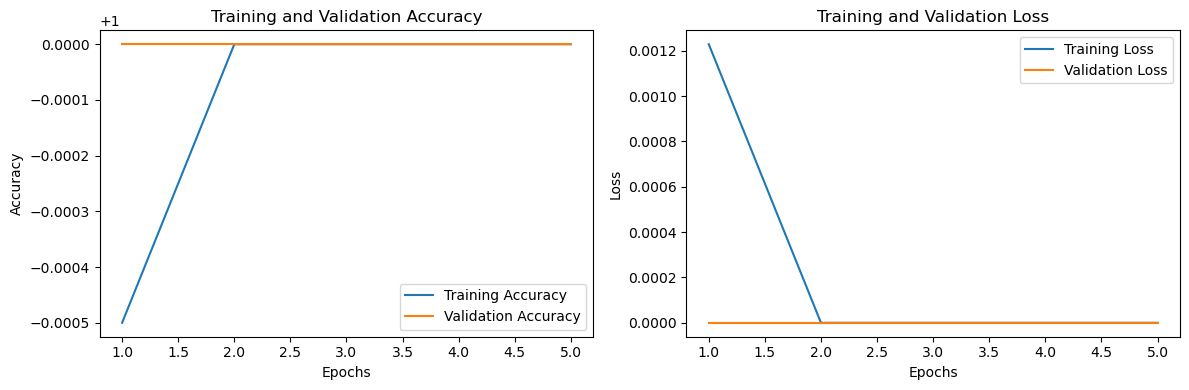

125/125 [==============================] - 16s 130ms/step - loss: 0.0000e+00 - accuracy: 1.0000

Test Accuracy: 100.00%
Test Loss: 0.0000


In [73]:

# Setting my paths and classes
CLASSES = ['c', 'h', 'e', 's', '.', 'j', 'p', 'g']

# Running the pipeline---
trained_model = run_pipeline(TRAIN_PATH, TEST_PATH, CLASSES, num_epochs=5)